In [1]:
# Import Packages

import tensorflow as tf
import numpy as np
import pandas as pd
import re # regular expressions

# For Data Preparation
import nltk.data
nltk.download('punkt')
tokenizer = nltk.data.load('nltk:tokenizers/punkt/english.pickle')

# For Word Embedding
import gensim
from gensim.models import Word2Vec
from gensim.models import Phrases
import logging
#import visword2vec as vv


from sklearn.decomposition import PCA
from matplotlib import pyplot


# For LSTM Model
from tensorflow.contrib import rnn
import pprint

pp = pprint.PrettyPrinter(indent=4)
sess = tf.InteractiveSession()
tf.set_random_seed(777)  # reproducibility

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eunbeejang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Preparation

In [2]:
# Data Processing

'''
#Read File
with open('FILE NAME', 'r') as f:
    bias_data = f.read()
'''

# Names for the columns (Header)
#cols = ['sentence', 'bias', 'sex', 'age', 'occupation', 'citizenship']

# Load the data from a CSV (returns type(dataframe))
bias_data = pd.read_csv('./scrapeBIG.csv', sep=',',  encoding='latin-1') # encoding='latin-1', names=cols, header=None,
print("Data loaded")


# Randomize data
bias_data = bias_data.reindex(np.random.permutation(bias_data.index))

# Replace NAN with Zero(0)
bias_data.fillna(0, inplace=True)


"""
# Accessing the data
bias_data.value
bias_data[rows:cols]

# Basic Stats about the data
bias_data.describe()
bias_data.count
"""

Data loaded


'\n# Accessing the data\nbias_data.value\nbias_data[rows:cols]\n\n# Basic Stats about the data\nbias_data.describe()\nbias_data.count\n'

In [3]:



bias_data[:10]




,Sentence,Bias,Sex,Age,Occupation,Citizenship
32,But our participants described how the effects...,0.0,0.0,0.0,0.0,0.0
150,"But the women's reviews include another, sharp...",0.0,0.0,0.0,0.0,0.0
355,Both analytical and compassionate reflect posi...,0.0,0.0,0.0,0.0,0.0
292,The prison experience made Andy Dufresne's fir...,0.0,0.0,0.0,0.0,0.0
243,They are more likely to be forced into prostit...,0.0,0.0,0.0,0.0,0.0
566,Your hairdresser is also not hitting on you; s...,0.0,0.0,0.0,0.0,0.0
455,"""It's not middle-class white young men who are...",0.0,0.0,0.0,0.0,0.0
220,Biases among prison officials and a mispercept...,0.0,0.0,0.0,0.0,0.0
772,Why is a girl in physics?,0.0,0.0,0.0,0.0,0.0
745,"First, The New York Times Book Review is widel...",0.0,0.0,0.0,0.0,0.0


In [19]:
sentence = bias_data['Sentence']
label = bias_data['Bias']

print(type(sentence))
print(type(label))
#weight = bias_data['Weight']

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [5]:
#print(sentence)
#print(label)
print(sentence[0])

Imagine walking down the street and seeing advertising screens change their content based on how you walk, how you talk, or even the shape of your chest.


In [6]:
# Convert a sentence into a list of words

def sentence_to_wordlist(sentence, remove_stopwords=False):
    # 1. Remove non-letters
    sentence_text = re.sub(r'[^\w\s]','', sentence)
    # 2. Convert words to lower case and split them
    words = sentence_text.lower().split()
    # 3. Return a list of words
    return(words)

In [7]:
sentence_to_wordlist(sentence[0])

['imagine',
 'walking',
 'down',
 'the',
 'street',
 'and',
 'seeing',
 'advertising',
 'screens',
 'change',
 'their',
 'content',
 'based',
 'on',
 'how',
 'you',
 'walk',
 'how',
 'you',
 'talk',
 'or',
 'even',
 'the',
 'shape',
 'of',
 'your',
 'chest']

In [8]:
# List of sentences where each sentence is a list of words
def data_to_sentences(data, tokenizer, remove_stopwords=False ):
    try:
        # 1. Use the NLTK tokenizer to split the text into sentences
        raw_sentences = tokenizer.tokenize(data.strip())
        # 2. Loop over each sentence
        sentences = []
        for raw_sentence in raw_sentences:
            # If a sentence is empty, skip it
            if len(raw_sentence) > 0:
                # Otherwise, call sentence_to_wordlist to get a list of words
                sentences.append(sentence_to_wordlist(raw_sentence))
        # 3. Return the list of sentences (each sentence is a list of words, so this returns a list of lists)
        len(sentences)
        #print('GOOD')
        return sentences
    except:
        print('ERROR :', data)

In [17]:
print(type(sentence))

<class 'pandas.core.series.Series'>


In [18]:
#sentence = bias_data['sentence'].tolist()

sentences = []

for i in range(0,len(sentence)):
    # Replace all the numbers with ### -- this will remove all the numbers from the sentence
    data = re.sub("\d", "####", sentence[i]) 
    # data = sentence[i].replace(/[0-9]+/g, '###')
    sentences += data_to_sentences(data, tokenizer)

print("There are " + str(len(sentences)) + " sentences in the corpus of bias_data.")
              
# Accessing each sentences
# sentences[index]

There are 895 sentences in the corpus of bias_data.


In [10]:
print(type(labels))
labels = bias_data['bias'].tolist()

# Word Embedding

In [11]:
# Create Word Vectors

# train model
model = Word2Vec(sentences, min_count=1)

# Calling init_sims will make the model will be better for memory if we don't want to train the model over and over again
model.init_sims(replace=True)

# Summarize the loaded model
print(model)

# Summarize vocabulary
words = list(model.wv.vocab)
print(words)

print(model['case'])
print(model['program'])




"""



# save model
model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

# access vector for one word
#print(model['sentence'])

"""


Word2Vec(vocab=3731, size=100, alpha=0.025)
['imagine', 'walking', 'down', 'the', 'street', 'and', 'seeing', 'advertising', 'screens', 'change', 'their', 'content', 'based', 'on', 'how', 'you', 'walk', 'talk', 'or', 'even', 'shape', 'of', 'your', 'chest', 'these', 'rely', 'hidden', 'cameras', 'microphones', 'computers', 'to', 'guess', 'if', 'youre', 'male', 'female', 'this', 'might', 'sound', 'futuristic', 'but', 'patrons', 'in', 'a', 'norwegian', 'pizzeria', 'discovered', 'its', 'exactly', 'what', 'was', 'happening', 'women', 'were', 'ads', 'for', 'salad', 'men', 'meat', 'options', 'software', 'running', 'digital', 'board', 'spilled', 'beans', 'when', 'it', 'crashed', 'displayed', 'underlying', 'code', 'motivation', 'behind', 'using', 'technology', 'have', 'been', 'improve', 'quality', 'user', 'experience', 'nevertheless', 'many', 'customers', 'unpleasantly', 'surprised', 'by', 'sort', 'situation', 'is', 'not', 'just', 'creepy', 'invasive', 'worse', 'efforts', 'at', 'automatic', 'gend

/Users/eunbeejang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  app.launch_new_instance()
/Users/eunbeejang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


"\n\n\n\n# save model\nmodel.save('model.bin')\n\n# load model\nnew_model = Word2Vec.load('model.bin')\nprint(new_model)\n\n# access vector for one word\n#print(model['sentence'])\n\n"

/Users/eunbeejang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


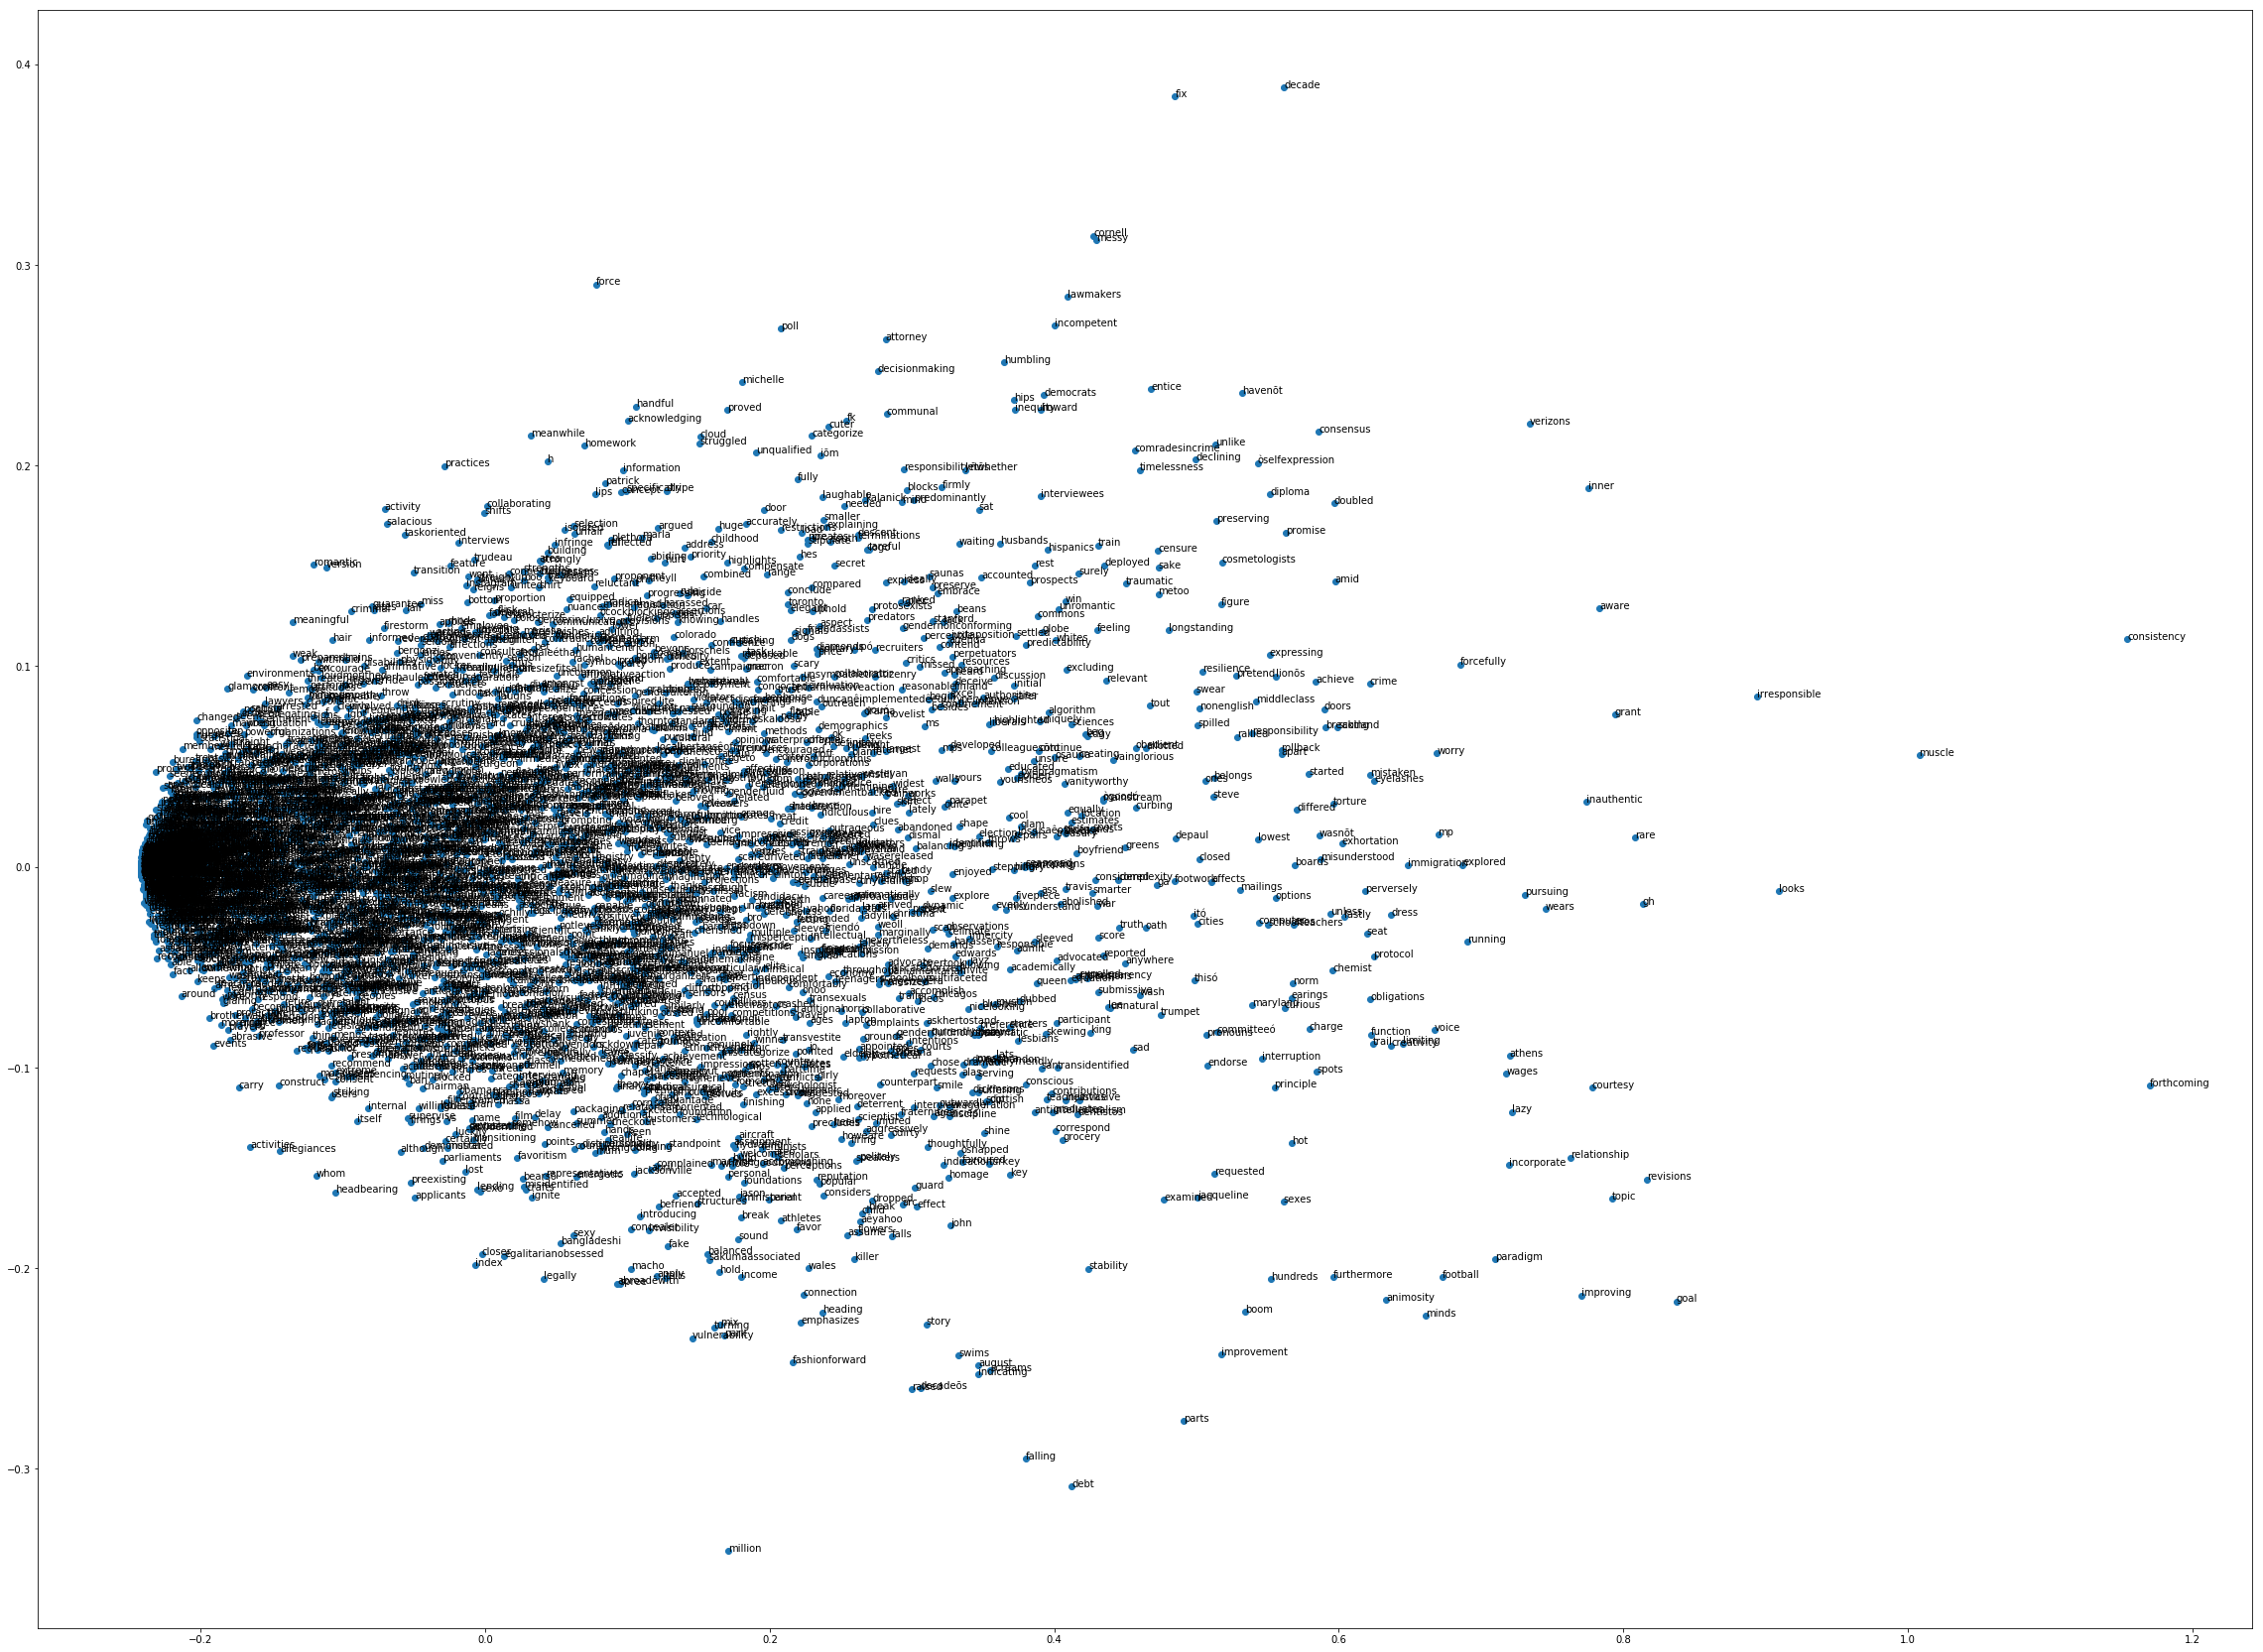

In [13]:

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.figure(figsize=(40,30))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()







In [56]:
# sentence_index = (example) sentence[0]
def sentence_to_vector(sentence_index):
    each_sentence = sentence_to_wordlist(sentence_index)
    each_sentence_vector = []
    for word in each_sentence:
        ##### ASK ANDRE:  Should the sentence be a list or a numpy array??
        each_sentence_vector.append([model[word]])
    each_sentence_vector = np.asarray(each_sentence_vector)
    #print(type(each_sentence_vector)) # Check the type of the sentence vector
    #print(each_sentence_vector.shape) # Check the shape of the sentence vector
    return each_sentence_vector

In [57]:
sentence_to_vector(sentence[0])

/Users/eunbeejang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


array([[[  4.37171310e-02,   1.11509245e-02,  -8.08984563e-02, ...,
           4.09162007e-02,  -7.94803202e-02,  -1.38987860e-04]],

       [[ -2.50024651e-03,  -8.32313225e-02,  -1.28241077e-01, ...,
           5.20581603e-02,  -1.38211295e-01,   1.40981525e-02]],

       [[  1.36161642e-02,   1.15711428e-03,  -1.48274809e-01, ...,
           7.34643042e-02,  -1.41807541e-01,  -1.23617928e-02]],

       ..., 
       [[  3.62739898e-02,  -2.13084128e-02,  -1.56885594e-01, ...,
           5.32590039e-02,  -1.45319745e-01,  -2.37270864e-03]],

       [[  3.53254154e-02,  -2.44039912e-02,  -1.58306196e-01, ...,
           4.64543812e-02,  -1.40384853e-01,  -8.66220798e-03]],

       [[  2.64374558e-02,  -4.22308072e-02,  -1.16209619e-01, ...,
           5.68062216e-02,  -6.15913831e-02,  -7.50232413e-02]]], dtype=float32)

(100,)
(100,)


/Users/eunbeejang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/Users/eunbeejang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
num_classes = len(sentence[0]) # length of one sentence
learning_rate = 0.1
hidden_size = 1 # size of output from the LSTM
input_dim = 100 # size of input vector dimension (is it gonna be the dimension of the word or the sentence?)
sequence_length = 1 
batch_size = 10 # num of sentences to be inputted each training (is 10 good enough?)
num_layers = 2 # num of hidden layers

In [ ]:
X = tf.placeholder(tf.float32, [None, sequence_length, input_dim]) # X one-hot, None: Batch size
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label



# Training, Validation, Test dataset

In [ ]:


split_fracsplit_fr  = 0.8
split_idx = int(len(features)*0.8)
train_x, val_x = features[:split_idx], features[split_idx:]
train_y, val_y = labels[:split_idx], labels[split_idx:]

test_idx = int(len(val_x)*0.5)
val_x, test_x = val_x[:test_idx], val_x[test_idx:]
val_y, test_y = val_y[:test_idx], val_y[test_idx:]

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

print("label set: \t\t{}".format(train_y.shape), 
      "\nValidation label set: \t{}".format(val_y.shape),
      "\nTest label set: \t\t{}".format(test_y.shape))

# LSTM Model Practice (tensor flow)

In [2]:
# RNN/LSTM Model

# One cell RNN input_dim(4) -> output_dim(2)
# sequnce_length 
num_classes = 5
learning_rate = 0.1
hidden_size = 256 # size of output from the LSTM
input_dim = 5 # one hot size
sequence_length = 6 # |hihello| == 6
batch_size = 1 # num of words to be inputted each training



# Data Creation
# idx2char: dictionary
idx2char = ['h', 'i', 'e', 'l', 'o']
# Teach hello: hihell -> ihello
x_data = [[0, 1, 0, 2, 3, 3]]   # hihell
x_one_hot = [[[1, 0, 0, 0, 0],   # h 0
              [0, 1, 0, 0, 0],   # i 1
              [1, 0, 0, 0, 0],   # h 0
              [0, 0, 1, 0, 0],   # e 2
              [0, 0, 0, 1, 0],   # l 3
              [0, 0, 0, 1, 0]]]  # l 3
y_data = [[1, 0, 2, 3, 3, 4]]    # ihello

"""
# One hot Encoding
h = [1, 0, 0, 0, 0] # 0:h
i = [0, 1, 0, 0, 0] # 1:i
e = [0, 0, 1, 0, 0] # 2:e
l = [0, 0, 0, 1, 0] # 3:l
o = [0, 0, 0, 0, 1] # 4:0

# shape of x_data : (batch size, sequence length, one hot vocab vector size)
x_data = np.array([[h,e,l,l,o],[e,o,l,l,l],[l,l,e,e,l]], dtype=np.float32)
print("x_data.shape = ", x_data.shape)
pp.pprint(x_data)
print("\n")


cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True, reuse=tf.AUTO_REUSE)
outputs, _states = tf.nn.dynamic_rnn(cell, x_data, dtype=tf.float32)
sess.run(tf.global_variables_initializer())

# shape of output : (batch size, sequence length, hidden size)
print("output.shape = ", outputs.shape)
pp.pprint(outputs.eval())
print("\n")

"""


X = tf.placeholder(tf.float32, [None, sequence_length, input_dim]) # X one-hot, None: Batch size
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label


# Basic LSTM
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_size, state_is_tuple=True, reuse=tf.AUTO_REUSE)
initial_state = cell.zero_state(batch_size, tf.float32) # Initial State is always ZERO
outputs, _states = tf.nn.dynamic_rnn(cell, X, initial_state=initial_state, dtype=tf.float32)


# FC layer
X_for_fc = tf.reshape(outputs, [-1, hidden_size])
# fc_w = tf.get_variable("fc_w", [hidden_size, num_classes])
# fc_b = tf.get_variable("fc_b", [num_classes])
# outputs = tf.matmul(X_for_fc, fc_w) + fc_b
outputs = tf.contrib.layers.fully_connected(inputs=X_for_fc, num_outputs=num_classes, activation_fn=None)



# Calculate Sequence_Loss
# reshape out for sequence_loss
outputs = tf.reshape(outputs, [batch_size, sequence_length, num_classes])
weights = tf.ones([batch_size, sequence_length])
sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs, targets=Y, weights=weights)
loss = tf.reduce_mean(sequence_loss)

train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
prediction = tf.argmax(outputs, axis=2)


# Teach RNN 'ihello'
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(20):
        l, _ = sess.run([loss, train], feed_dict={X: x_one_hot, Y: y_data})
        result = sess.run(prediction, feed_dict={X: x_one_hot})
        print(i, "loss:", l, "\nprediction: ", result, "\ntrue Y: ", y_data)

        # print char using dic
        result_str = [idx2char[c] for c in np.squeeze(result)]
        print("\nPrediction str: ", ''.join(result_str), "\n==============")










0 loss: 1.60788 
prediction:  [[3 3 3 3 3 3]] 
true Y:  [[1, 0, 2, 3, 3, 4]]

Prediction str:  llllll 
1 loss: 1.51026 
prediction:  [[3 3 3 3 3 3]] 
true Y:  [[1, 0, 2, 3, 3, 4]]

Prediction str:  llllll 
2 loss: 1.4327 
prediction:  [[3 3 3 3 3 3]] 
true Y:  [[1, 0, 2, 3, 3, 4]]

Prediction str:  llllll 
3 loss: 1.34895 
prediction:  [[3 3 3 3 3 3]] 
true Y:  [[1, 0, 2, 3, 3, 4]]

Prediction str:  llllll 
4 loss: 1.25513 
prediction:  [[1 3 3 3 3 3]] 
true Y:  [[1, 0, 2, 3, 3, 4]]

Prediction str:  illlll 
5 loss: 1.14044 
prediction:  [[1 3 3 3 3 3]] 
true Y:  [[1, 0, 2, 3, 3, 4]]

Prediction str:  illlll 
6 loss: 1.01676 
prediction:  [[1 3 2 3 3 4]] 
true Y:  [[1, 0, 2, 3, 3, 4]]

Prediction str:  ilello 
7 loss: 0.896927 
prediction:  [[1 3 2 3 3 4]] 
true Y:  [[1, 0, 2, 3, 3, 4]]

Prediction str:  ilello 
8 loss: 0.769525 
prediction:  [[1 0 2 3 3 4]] 
true Y:  [[1, 0, 2, 3, 3, 4]]

Prediction str:  ihello 
9 loss: 0.655007 
prediction:  [[1 0 2 3 3 4]] 
true Y:  [[1, 0, 2, 3, 3

# LSTM MODEL for Bias Analysis Temp

In [61]:
num_classes = 5
learning_rate = 0.1
hidden_size = 5 # size of output from the LSTM
input_dim = 5 # one hot size
sequence_length = 6 # |hihello| == 6
batch_size = 1 # num of words to be inputted each training
num_layers = 2 # num of hidden layers



X = tf.placeholder(tf.float32, [None, sequence_length, input_dim]) # X one-hot, None: Batch size
Y = tf.placeholder(tf.int32, [None, sequence_length])  # Y label

# Multilayer LSTM
cell = tf.contrib.rnn.LSTMCell(num_units=hidden_size, state_is_tuple=True, reuse=tf.AUTO_REUSE)
cell = tf.contrib.rnn.MultiRNNCell(num_units=[cell]*num_layers, state_is_tuple=True, reuse=tf.AUTO_REUSE)

#states_series, current_state = tf.nn.rnn(cell, batch_size, initial_state=rnn_tuple_state)


initial_state = cell.zero_state(batch_size, tf.float32) # Initial State is always ZERO
outputs, _states = tf.nn.dynamic_rnn(cell, X, initial_state=initial_state, dtype=tf.float32)

# Softmax
X_for_softmax = tf.reshape(outputs, [-1, hidden_size])

softmax_w = tf.get_variable("softmax_w", [hidden_size, num_classes]) # [input, output]
softmax_b = tf.get_variable("softmax_b", [num_classes])

outputs = tf.matmul(X_for_softmax, softmax_b) # Softmax output

# Reshape output for sequence_loss
outputs = tf.reshape(outputs, [batch_size, seq_length, num_classes]) # shape should be the same as RNN's output

# Set all weights equally
weights = tf.ones([batch_size, seq_length])

sequence_loss = tf.contrib.seq2seq.sequence_loss(logits=outputs targets=Y, weights=weights)
mean_loss = tf.reduce_mean(sequence_loss)

train_op = tf.train.AdamOptimizer(learning_rate).minimize(mean_loss)



SyntaxError: invalid syntax (<ipython-input-61-6deef39b246a>, line 38)

In [ ]:
# Training

session = tf.Session()
session.run(tf.global_variable_initializer())

for i in range(500):
    _, loss, results = session.run([train_op, mean_loss, outputs], feed_dict = {X: dataX, Y: dataY})
    
    for j, result in enumerate(results):
        index = np.argmax(result, axis=1)
        print(i, j, ''.join([char_set[t] for t in index]), loss)

In [ ]:
# Training and print results

results = session.run(outputs, feed_dict = {X: dataX})
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j is 0: # Print all for the first result to make a sentence
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')